In [1]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['r', 'k', 'b', 'm', 'g']
linestyles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5))]

# Malodour and Water interaction strength

In [2]:
mal_sol_paths = "mal_sol/run{0}/{1}"
runs = [1, 2, 3]
malodours = ["ETB", "HEP", "MBA"]

data = np.loadtxt("mal_sol/run1/HEP/LJSR.xvg", comments=['@', '#'])
LJSR = np.zeros((len(malodours), len(runs), data.shape[0]))
CSR = np.zeros((len(malodours), len(runs), data.shape[0]))

In [3]:
for i, mal in enumerate(malodours):
    for j, run in enumerate(runs):
        path = mal_sol_paths.format(run, mal)
        data = np.loadtxt(path + "/LJSR.xvg", comments=['@', '#'])
        LJSR[i, j] = data[:, -1]
        data = np.loadtxt(path + "/CSR.xvg", comments=['@', '#'])
        CSR[i, j] = data[:, -1]

time = data[:, 0]

LJSR_avg = np.average(LJSR, axis = 1)
LJSR_std = np.std(LJSR, axis = 1)

CSR_avg = np.average(CSR, axis = 1)
CSR_std = np.std(CSR, axis = 1)

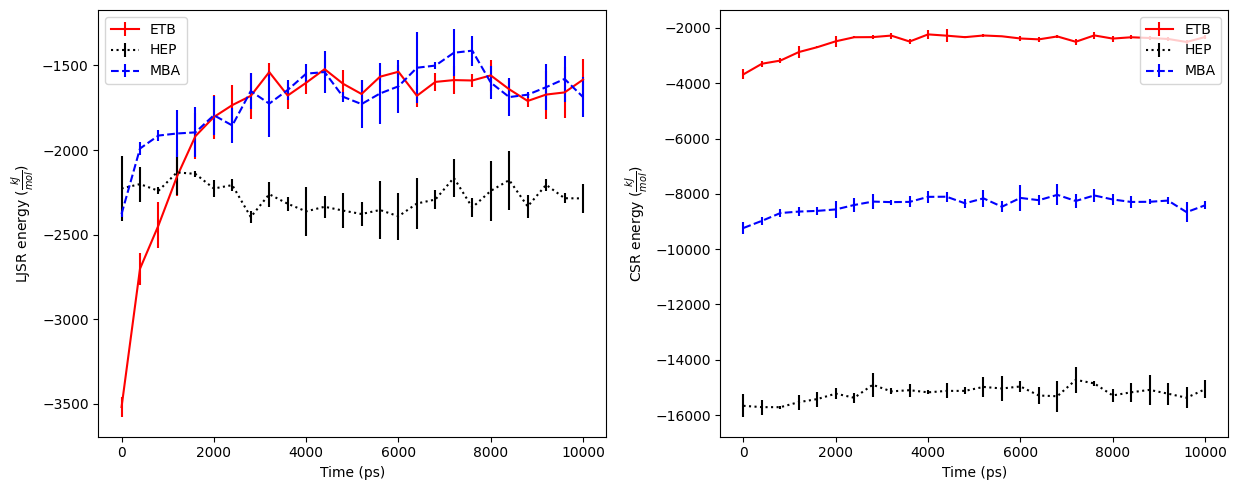

In [4]:
sz = 5
ar = 1.25

fig, axs = plt.subplots(1, 2, figsize = (sz*2*ar, sz))

ax = axs[0]
for i in range(len(malodours)):
    ax.errorbar(time, LJSR_avg[i], yerr = LJSR_std[i], color = colors[i], linestyle = linestyles[i], label = malodours[i])

ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"LJSR energy ($\frac{kJ}{mol}$)")
ax.legend()

ax = axs[1]
for i in range(len(malodours)):
    ax.errorbar(time, CSR_avg[i], yerr = CSR_std[i], color = colors[i], linestyle = linestyles[i], label = malodours[i])

ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"CSR energy ($\frac{kJ}{mol}$)")
ax.legend()

fig.tight_layout()
fig.savefig("mal_FF_constants.svg")
fig.savefig("mal_FF_constants.png", dpi = 300)

In [5]:
min_time = 8000
max_time = 10000

min_idx = np.where(time == min_time)[0][0]
max_idx = np.where(time == max_time)[0][0]

slc = slice(min_idx, max_idx)

LJSR_val = np.average(LJSR_avg[:, slc], axis = -1)
CSR_val = np.average(CSR_avg[:, slc], axis = -1)

print("Mal: {0:.10s}      {1:.10s}".format("LJSR", "CSR"))
for i in range(3):
    print(f"{malodours[i]}: {LJSR_val[i]:.3f} {CSR_val[i]:.3f}")

Mal: LJSR      CSR
ETB: -1648.059 -2399.477
HEP: -2248.105 -15230.426
MBA: -1633.729 -8337.685


# PET chain and water interaction strength

In [6]:
pet_sol_paths = "pet_sol/run{0}"
runs = [1, 2, 3]

data = np.loadtxt("pet_sol/run1/LJSR.xvg", comments=['@', '#'])
LJSR = np.zeros((len(runs), data.shape[0]))
CSR = np.zeros((len(runs), data.shape[0]))

In [7]:
for i, run in enumerate(runs):
    path = pet_sol_paths.format(run)
    data = np.loadtxt(path + "/LJSR.xvg", comments=['@', '#'])
    LJSR[i] = data[:, -1]
    data = np.loadtxt(path + "/CSR.xvg", comments=['@', '#'])
    CSR[i] = data[:, -1]

time = data[:, 0]

LJSR_avg = np.average(LJSR, axis = 0)
LJSR_std = np.std(LJSR, axis = 0)

CSR_avg = np.average(CSR, axis = 0)
CSR_std = np.std(CSR, axis = 0)

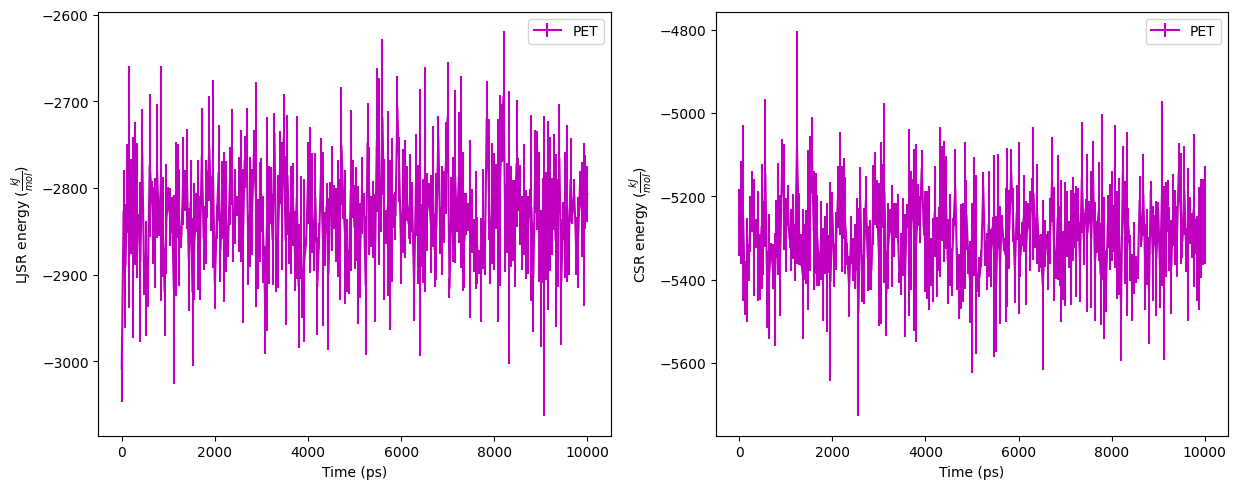

In [8]:
sz = 5
ar = 1.25

fig, axs = plt.subplots(1, 2, figsize = (sz*2*ar, sz))

ax = axs[0]
ax.errorbar(time, LJSR_avg, yerr = LJSR_std, color = colors[3], label = "PET")

ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"LJSR energy ($\frac{kJ}{mol}$)")
ax.legend()

ax = axs[1]
ax.errorbar(time, CSR_avg, yerr = CSR_std, color = colors[3], label = "PET")

ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"CSR energy ($\frac{kJ}{mol}$)")
ax.legend()

fig.tight_layout()
fig.savefig("pet_FF_constants.svg")
fig.savefig("pet_FF_constants.png", dpi = 300)

In [9]:
min_time = 8000
max_time = 10000

min_idx = np.where(time == min_time)[0][0]
max_idx = np.where(time == max_time)[0][0]

slc = slice(min_idx, max_idx)

LJSR_val = np.average(LJSR_avg[slc])
CSR_val = np.average(CSR_avg[slc])

print("Mal: {0:.10s}      {1:.10s}".format("LJSR", "CSR"))
print(f"PET: {LJSR_val:.3f} {CSR_val:.3f}")

Mal: LJSR      CSR
PET: -2827.765 -5292.352
